In [3]:
import pandas as pd
df = pd.read_csv("quotes_with_tags.csv")
df.head(10)


,quote,author,tags
0,“The world as we have created it is a process ...,Albert Einstein,change;deep-thoughts;thinking;world
1,"“It is our choices, Harry, that show what we t...",J.K. Rowling,abilities;choices
2,“There are only two ways to live your life. On...,Albert Einstein,inspirational;life;live;miracle;miracles
3,"“The person, be it gentleman or lady, who has ...",Jane Austen,aliteracy;books;classic;humor
4,"“Imperfection is beauty, madness is genius and...",Marilyn Monroe,be-yourself;inspirational
5,“Try not to become a man of success. Rather be...,Albert Einstein,adulthood;success;value
6,“It is better to be hated for what you are tha...,André Gide,life;love
7,"“I have not failed. I've just found 10,000 way...",Thomas A. Edison,edison;failure;inspirational;paraphrased
8,“A woman is like a tea bag; you never know how...,Eleanor Roosevelt,misattributed-eleanor-roosevelt
9,"“A day without sunshine is like, you know, nig...",Steve Martin,humor;obvious;simile


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   quote   10 non-null     object
 1   author  10 non-null     object
 2   tags    10 non-null     object
dtypes: object(3)
memory usage: 372.0+ bytes
None


In [5]:
author_counts = df['author'].value_counts()
print("Top authors:\n", author_counts)

Top authors:
 author
Albert Einstein      3
J.K. Rowling         1
Jane Austen          1
Marilyn Monroe       1
André Gide           1
Thomas A. Edison     1
Eleanor Roosevelt    1
Steve Martin         1
Name: count, dtype: int64


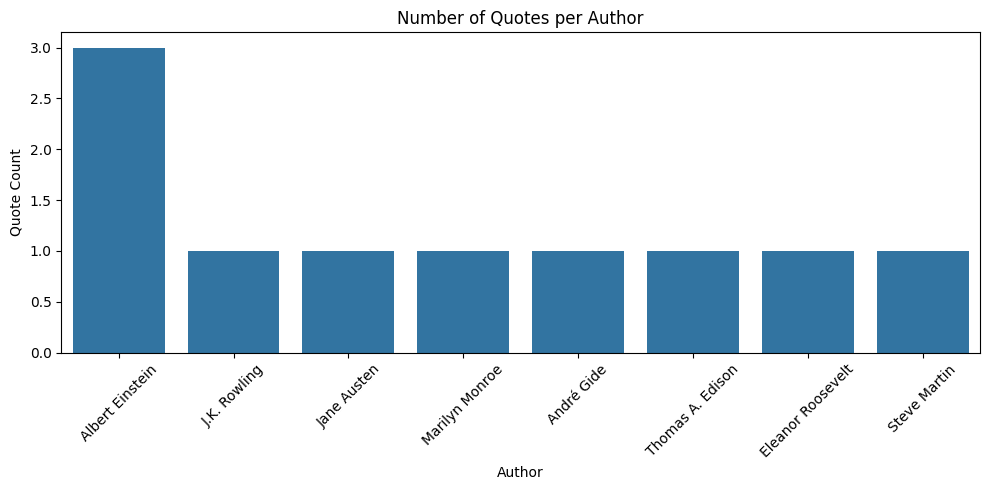

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.barplot(x=author_counts.index, y=author_counts.values)
plt.xticks(rotation=45)
plt.title("Number of Quotes per Author")
plt.xlabel("Author")
plt.ylabel("Quote Count")
plt.tight_layout()
plt.show()

In [11]:
from collections import Counter
all_tags = []
for tag_list in df['tags']:
    tags = tag_list.split(';')  
    all_tags.extend(tags)
tag_counts = Counter(all_tags)
print("Common tags are:")
for tag, count in tag_counts.most_common(10):
    print(f"{tag}: {count}")


Common tags are:
inspirational: 3
life: 2
humor: 2
change: 1
deep-thoughts: 1
thinking: 1
world: 1
abilities: 1
choices: 1
live: 1


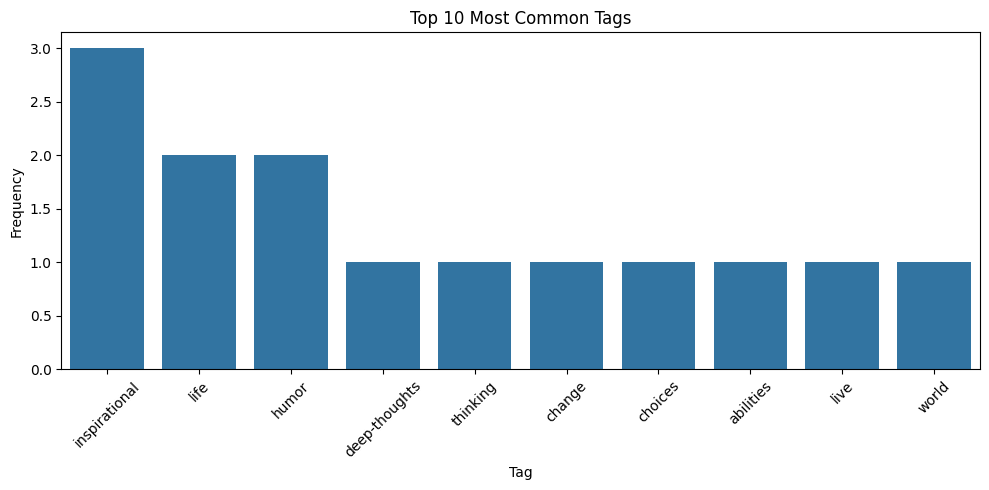

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
tags_df = pd.DataFrame(tag_counts.items(), columns=['tag', 'count']).sort_values(by="count", ascending=False).head(10)
plt.figure(figsize=(10,5))
sns.barplot(x='tag', y='count', data=tags_df)
plt.title("Top 10 Most Common Tags")
plt.xlabel("Tag")
plt.ylabel("Frequency")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [13]:
df['word_count'] = df['quote'].apply(lambda x: len(x.split()))

In [14]:
print("Average words per quote:", df['word_count'].mean())
print("Max words in a quote:", df['word_count'].max())
print("Quote with the most words:\n", df.loc[df['word_count'].idxmax(), 'quote'])

Average words per quote: 17.1
Max words in a quote: 26
Quote with the most words:
 “There are only two ways to live your life. One is as though nothing is a miracle. The other is as though everything is a miracle.”


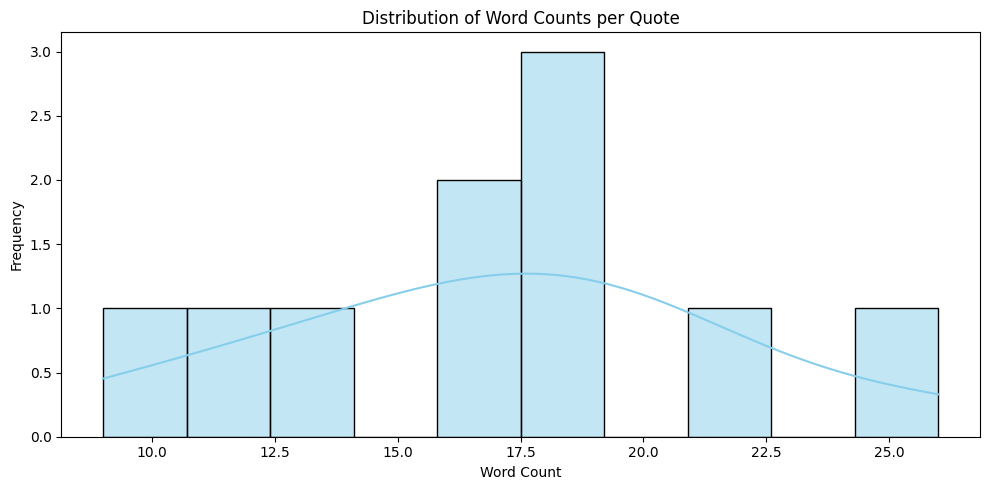

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.histplot(df['word_count'], bins=10, kde=True, color='skyblue')
plt.title("Distribution of Word Counts per Quote")
plt.xlabel("Word Count")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()